# Logistic Regression To Predict Heart Disease

## Libraries for ML

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading and One Hot Encoding for Educational Level

In [3]:
dataset = pd.read_csv('framingham.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[  1.    39.     4.   ...  26.97  80.    77.  ]
 [  0.    46.     2.   ...  28.73  95.    76.  ]
 [  1.    48.     1.   ...  25.34  75.    70.  ]
 ...
 [  0.    48.     2.   ...  22.    84.    86.  ]
 [  0.    44.     1.   ...  19.16  86.      nan]
 [  0.    52.     2.   ...  21.47  80.   107.  ]]


In [5]:
print(y)

[0 0 0 ... 0 0 0]


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
column_transformer = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2])], remainder = 'passthrough')
X = np.array(column_transformer.fit_transform(X))

In [7]:
print(X)

[[  0.     0.     0.   ...  26.97  80.    77.  ]
 [  0.     1.     0.   ...  28.73  95.    76.  ]
 [  1.     0.     0.   ...  25.34  75.    70.  ]
 ...
 [  0.     1.     0.   ...  22.    84.    86.  ]
 [  1.     0.     0.   ...  19.16  86.      nan]
 [  0.     1.     0.   ...  21.47  80.   107.  ]]


## Handling Missing Data

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X = imputer.fit_transform(X)

In [9]:
print(X)

[[  0.           0.           0.         ...  26.97        80.
   77.        ]
 [  0.           1.           0.         ...  28.73        95.
   76.        ]
 [  1.           0.           0.         ...  25.34        75.
   70.        ]
 ...
 [  0.           1.           0.         ...  22.          84.
   86.        ]
 [  1.           0.           0.         ...  19.16        86.
   81.96675325]
 [  0.           1.           0.         ...  21.47        80.
  107.        ]]


## Split Training And Test Data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
print(len(X_train))

3390


In [12]:
print(len(X_test))

848


In [13]:
print(len(y_train))

3390


In [14]:
print(len(y_test))

848


## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train[:, 3:] = standard_scaler.fit_transform(X_train[:, 3:])
X_test[:, 3:] = standard_scaler.fit_transform(X_test[:, 3:])

In [16]:
print(X_train)

[[ 0.          0.          1.         ...  0.52042544 -0.08285558
  -0.22774225]
 [ 1.          0.          0.         ... -1.09203079  1.33069305
  -0.22774225]
 [ 0.          0.          0.         ...  2.00359244 -0.08285558
  -0.09618503]
 ...
 [ 0.          0.          1.         ...  0.11060298 -0.91435478
   0.34233906]
 [ 0.          0.          1.         ...  0.02034446  2.41164201
  -0.00993816]
 [ 0.          1.          0.         ... -0.06503522  0.49919386
   0.25463424]]


In [17]:
print(X_test)

[[ 1.          0.          0.         ...  0.38626539 -0.03408391
  -0.56955231]
 [ 0.          1.          0.         ... -1.57503927 -0.70067176
  -0.35151311]
 [ 0.          1.          0.         ... -0.7095345   0.38253349
  -0.43872879]
 ...
 [ 0.          0.          1.         ...  0.81395634 -0.20073088
  -0.39512095]
 [ 0.          1.          0.         ... -1.33715199 -0.61734828
   0.17178096]
 [ 0.          1.          0.         ...  1.36818308  1.2157683
  -0.17708175]]


## Model Creation and Fitting Training Data

In [18]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state = 0)
regressor.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting Test Data

In [19]:
y_pred = regressor.predict(X_test)

## Regression Metrics

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

87.02830188679245

## Visualization

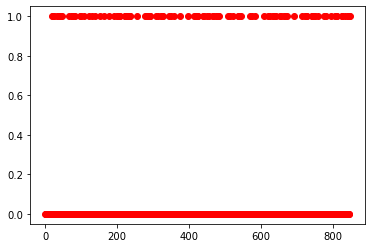

In [22]:
plt.scatter(np.arange(0, len(X_test), 1), y_test, color = 'red')